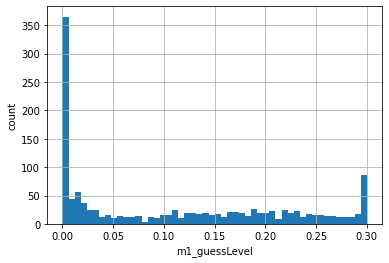

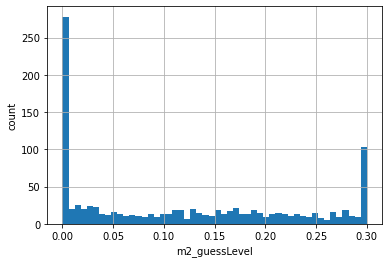

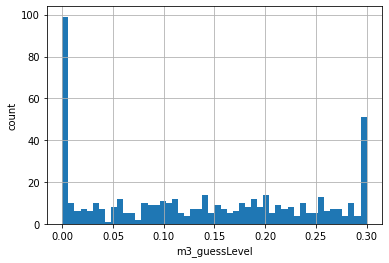

In [16]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import ast
'''
# Json 파일 읽기
pbsirt = pd.read_json('./pbsirt_necessary.json')

print(type(pbsirt))
print("=========================")
print("start reduce copies", end="\n\n")

# 중복제거
with open('m1pbs.txt', 'r') as inf:
    m1pbs_dict = ast.literal_eval(inf.read())
with open('m2pbs.txt', 'r') as inf:
    m2pbs_dict = ast.literal_eval(inf.read())
with open('m3pbs.txt', 'r') as inf:
    m3pbs_dict = ast.literal_eval(inf.read())
#m3pbs_dict: list
#m3pbs_dict[0]: dict
m1pbs_list = []
m2pbs_list = []
m3pbs_list = []

#각 리스트의 요소별로 testID 값과 assessmentItemID 값을 합친 것. 두 값 다 문자열이길래 더했음.
for i in range(len(m1pbs_dict)):
    m1pbs_list.append(m1pbs_dict[i]["testID"]+m1pbs_dict[i]["assessmentItemID"])
for i in range(len(m2pbs_dict)):
    m2pbs_list.append(m2pbs_dict[i]["testID"]+m2pbs_dict[i]["assessmentItemID"])
for i in range(len(m3pbs_dict)):
    m3pbs_list.append(m3pbs_dict[i]["testID"]+m3pbs_dict[i]["assessmentItemID"])

#set 함수 이용해서 testID + assessmentItemID 의 중복 제거
m1pbs_set = set(m1pbs_list)
m2pbs_set = set(m2pbs_list)
m3pbs_set = set(m3pbs_list)

print(len(m1pbs_list))
print(len(m2pbs_list))
print(len(m3pbs_list))

#각 학년이 푼 문제들의 추측도 저장
m1guess = []
m2guess = []
m3guess = []

#m1pbs ex): {"testID": "A070000068", "assessmentItemID": "A070068009"}
for idx, row in pbsirt.iterrows():
    semidata = row.testID + row.assessmentItemID
    data = {"testID": row.testID, "assessmentItemID": row.assessmentItemID, "knowledgeTag": row.knowledgeTag, "guessLevel": row.guessLevel}
    
    if semidata in m1pbs_set:
        m1guess.append(data)
        
    if semidata in m2pbs_set:
        m2guess.append(data)
        
    if semidata in m3pbs_set:
        m3guess.append(data)

    if (idx % 50000 == 0):
        print(idx)
    elif (idx % 5000 == 0):
        print(".", end=" ")

print("====================================")
print(idx)
print(len(m1guess))
print(len(m2guess))
print(len(m3guess))

m1_list = json.dumps(m1guess)
m2_list = json.dumps(m2guess)
m3_list = json.dumps(m3guess)

#문제별 추측도와 지식체계 리스트 파일 저장
with open('m1pbsKTGL.txt', 'w') as outfile:
    outfile.write(m1_list)
with open('m2pbsKTGL.txt', 'w') as outfile:
    outfile.write(m2_list)
with open('m3pbsKTGL.txt', 'w') as outfile:
    outfile.write(m3_list)
'''
m1 = pd.read_json('./중복제거_ktgl/m1pbsKTGL.json')
m2 = pd.read_json('./중복제거_ktgl/m2pbsKTGL.json')
m3 = pd.read_json('./중복제거_ktgl/m3pbsKTGL.json')

#각 학년별 추측도 그래프 그리기
matplotlib.rcParams['axes.unicode_minus'] = False

#추측도 시각화
#1학년
plt.hist(m1['guessLevel'], bins=50)
plt.xlabel("m1_guessLevel")
plt.ylabel("count")

plt.grid()
plt.show()
#2학년
plt.hist(m2['guessLevel'], bins=50)
plt.xlabel("m2_guessLevel")
plt.ylabel("count")

plt.grid()
plt.show()

#3학년
plt.hist(m3['guessLevel'], bins=50)
plt.xlabel("m3_guessLevel")
plt.ylabel("count")

plt.grid()
plt.show()
